In [2]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Dataset, transforms, and visualisation

In [4]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True,
                                        transform=transform_test)

100%|██████████| 170M/170M [00:03<00:00, 42.8MB/s]


In [6]:
num_classes = 10

In [7]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True,
                                        transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [8]:
batch_size = 4

In [9]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([16, 3, 224, 224])
torch.Size([3, 224, 224])
4


In [10]:
def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5
    plt.figure(figsize=(batch_size, 1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [11]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

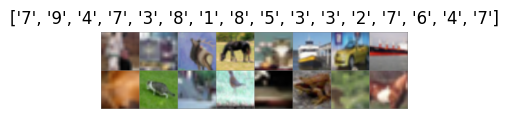

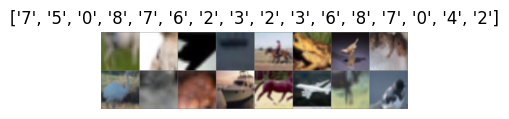

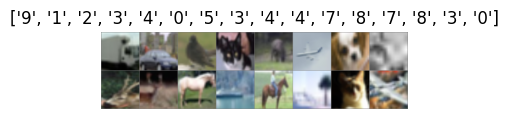

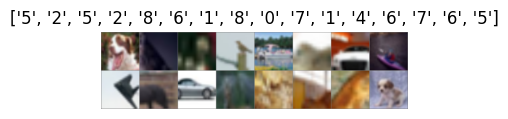

In [12]:
for i in range(4):
    show_batch_images(trainloader)

## Creating VGG-16

https://pytorch.org/docs/master/_modules/torchvision/models/vgg.html

In [13]:
from torchvision import models

In [14]:
vgg = models.vgg16_bn()

In [15]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [16]:
print(vgg.features[0])

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [17]:
print(vgg.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


In [18]:
import torch.nn as nn

num_classes = 10
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features, num_classes)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [19]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

### Train CIFAR10

In [22]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [23]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [24]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

In [25]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        del inputs, labels, outputs
        torch.cuda.empty_cache()

        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs,
        evaluation(testloader, vgg), evaluation(trainloader, vgg)))

plt.plot(loss_epoch_arr)
plt.show()

Iteration: 0/3125, Loss: 2.42
Iteration: 100/3125, Loss: 2.04
Iteration: 200/3125, Loss: 2.15
Iteration: 300/3125, Loss: 2.00
Iteration: 400/3125, Loss: 2.11
Iteration: 500/3125, Loss: 1.94
Iteration: 600/3125, Loss: 2.11
Iteration: 700/3125, Loss: 2.19
Iteration: 800/3125, Loss: 2.19
Iteration: 900/3125, Loss: 2.16
Iteration: 1000/3125, Loss: 1.88
Iteration: 1100/3125, Loss: 2.28
Iteration: 1200/3125, Loss: 1.91
Iteration: 1300/3125, Loss: 2.27
Iteration: 1400/3125, Loss: 2.08
Iteration: 1500/3125, Loss: 1.97


KeyboardInterrupt: 

### Freeze layers of Convolutional Operations

In [26]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [27]:
vgg = models.vgg16_bn(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


100%|██████████| 528M/528M [00:05<00:00, 94.0MB/s]


In [28]:
for param in vgg.parameters():
    param.requires_grad = False

In [29]:
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)

In [30]:
for param in vgg.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 4096])
torch.Size([10])


In [31]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

In [35]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(100/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        if i % 10 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))

        del inputs, labels, outputs
        torch.cuda.empty_cache()

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs,
        evaluation(testloader, vgg), evaluation(trainloader, vgg)))


plt.plot(loss_epoch_arr)
plt.show()

Iteration: 0/7, Loss: 1.30
Iteration: 10/7, Loss: 2.46
Iteration: 20/7, Loss: 2.36
Iteration: 30/7, Loss: 2.78
Iteration: 40/7, Loss: 2.34
Iteration: 50/7, Loss: 2.56
Iteration: 60/7, Loss: 2.43
Iteration: 70/7, Loss: 2.54
Iteration: 80/7, Loss: 1.39
Iteration: 90/7, Loss: 1.26
Iteration: 100/7, Loss: 1.82
Iteration: 110/7, Loss: 1.91
Iteration: 120/7, Loss: 1.44
Iteration: 130/7, Loss: 1.52
Iteration: 140/7, Loss: 1.77
Iteration: 150/7, Loss: 2.16
Iteration: 160/7, Loss: 1.96
Iteration: 170/7, Loss: 1.49
Iteration: 180/7, Loss: 1.72
Iteration: 190/7, Loss: 2.82
Iteration: 200/7, Loss: 1.84
Iteration: 210/7, Loss: 2.51
Iteration: 220/7, Loss: 2.04
Iteration: 230/7, Loss: 2.12
Iteration: 240/7, Loss: 1.95
Iteration: 250/7, Loss: 2.24
Iteration: 260/7, Loss: 2.12
Iteration: 270/7, Loss: 1.97
Iteration: 280/7, Loss: 2.22
Iteration: 290/7, Loss: 1.86
Iteration: 300/7, Loss: 2.59
Iteration: 310/7, Loss: 2.61
Iteration: 320/7, Loss: 2.54
Iteration: 330/7, Loss: 1.58
Iteration: 340/7, Loss: 1

KeyboardInterrupt: 

### With model copies

In [36]:
import copy

In [37]:
loss_epoch_arr = []
max_epochs = 1

min_loss = 10

n_iters = np.ceil(50/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(vgg.state_dict())
            print('Min loss %0.2f' % min_loss)

        if i % 10 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))

        del inputs, labels, outputs
        torch.cuda.empty_cache()

    loss_epoch_arr.append(loss.item())

Min loss 1.49
Iteration: 0/3125, Loss: 1.49
Min loss 1.17
Min loss 0.98
Min loss 0.92
Min loss 0.84
Iteration: 100/3125, Loss: 2.21
Min loss 0.83
Iteration: 200/3125, Loss: 2.03
Min loss 0.74
Min loss 0.70
Iteration: 300/3125, Loss: 2.12
Iteration: 400/3125, Loss: 2.93
Iteration: 500/3125, Loss: 2.47
Min loss 0.59
Iteration: 600/3125, Loss: 2.11
Iteration: 700/3125, Loss: 1.44
Iteration: 800/3125, Loss: 2.77


KeyboardInterrupt: 

In [38]:
vgg.load_state_dict(best_model)
print(evaluation(trainloader, vgg), evaluation(testloader, vgg))

KeyboardInterrupt: 

## ResNet Model

https://pytorch.org/docs/master/_modules/torchvision/models/resnet.html

In [39]:
resnet = models.resnet18(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 185MB/s]


In [40]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [41]:
for param in resnet.parameters():
    param.requires_grad = False

In [42]:
in_features = resnet.fc.in_features
resnet.fc = nn.Linear(in_features, num_classes)

In [44]:
for param in resnet.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 512])
torch.Size([10])


In [45]:
resnet = resnet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(resnet.parameters(), lr=0.01)

Min loss 2.42
Iteration: 0/7, Loss: 2.42
Min loss 2.35
Min loss 2.35
Min loss 2.28
Min loss 2.19
Min loss 2.14
Min loss 2.14
Min loss 2.08
Min loss 2.05
Min loss 2.03
Min loss 2.00
Min loss 1.89
Min loss 1.77
Min loss 1.73
Min loss 1.62
Min loss 1.61
Iteration: 100/7, Loss: 2.05
Min loss 1.54
Min loss 1.54
Min loss 1.50
Min loss 1.42
Min loss 1.23
Iteration: 200/7, Loss: 1.67
Min loss 1.18
Iteration: 300/7, Loss: 1.34
Min loss 1.08
Iteration: 400/7, Loss: 1.56
Min loss 1.05
Min loss 1.02
Iteration: 500/7, Loss: 1.43
Min loss 1.00
Min loss 0.80
Iteration: 600/7, Loss: 1.22
Iteration: 700/7, Loss: 1.31
Iteration: 800/7, Loss: 1.28
Min loss 0.76
Iteration: 900/7, Loss: 1.73
Min loss 0.76
Iteration: 1000/7, Loss: 1.55
Iteration: 1100/7, Loss: 1.03
Min loss 0.72
Min loss 0.67
Iteration: 1200/7, Loss: 0.83
Min loss 0.59
Iteration: 1300/7, Loss: 1.02
Iteration: 1400/7, Loss: 1.24
Iteration: 1500/7, Loss: 1.70
Iteration: 1600/7, Loss: 1.08
Iteration: 1700/7, Loss: 1.23
Min loss 0.56
Iteration:

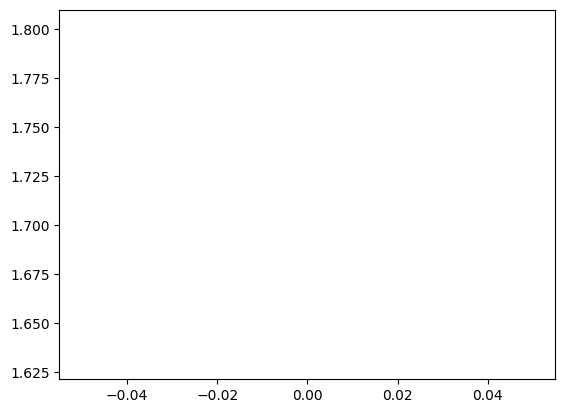

In [46]:
loss_epoch_arr = []
max_epochs = 1

min_loss = 10

n_iters = np.ceil(100/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = resnet(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(resnet.state_dict())
            print('Min loss %0.2f' % min_loss)

        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))

        del inputs, labels, outputs
        torch.cuda.empty_cache()

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs,
        evaluation(testloader, resnet), evaluation(trainloader, resnet)))


plt.plot(loss_epoch_arr)
plt.show()

In [47]:
resnet.load_state_dict(best_model)
print(evaluation(trainloader, resnet), evaluation(testloader, resnet))

54.976 55.13


## Inception Model

https://pytorch.org/docs/master/_modules/torchvision/models/inception.html

In [48]:
inception = models.inception_v3(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


100%|██████████| 104M/104M [00:00<00:00, 187MB/s] 


In [49]:
print(inception)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [50]:
for param in inception.parameters():
    param.requires_grad = False

In [51]:
aux_in_features = inception.AuxLogits.fc.in_features
inception.AuxLogits.fc = nn.Linear(aux_in_features, num_classes)

In [52]:
for param in inception.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 768])
torch.Size([10])


In [53]:
in_features = inception.fc.in_features
inception.fc = nn.Linear(in_features, num_classes)

In [54]:
for param in inception.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 768])
torch.Size([10])
torch.Size([10, 2048])
torch.Size([10])


In [55]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(299),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(299),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [56]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True,
                                        transform=transform_test)

In [57]:
batch_size=16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [58]:
inception = inception.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(inception.parameters(), lr=0.01)

In [59]:
def evaluation_inception(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs, aux_outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [63]:
loss_epoch_arr = []
max_epochs = 1

min_loss = 100

n_iters = np.ceil(50/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs, aux_outputs = inception(inputs)
        loss = loss_fn(outputs, labels) + 0.3 * loss_fn(aux_outputs, labels)
        loss.backward()
        opt.step()

        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(inception.state_dict())
            print('Min loss %0.2f' % min_loss)

        if i % 10 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))

        del inputs, labels, outputs
        torch.cuda.empty_cache()

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs,
        evaluation_inception(testloader, inception),
        evaluation_inception(trainloader, inception)))


plt.plot(loss_epoch_arr)
plt.show()

Min loss 2.22
Iteration: 0/4, Loss: 2.22
Min loss 1.25
Iteration: 10/4, Loss: 1.46
Iteration: 20/4, Loss: 2.60
Iteration: 30/4, Loss: 2.06
Iteration: 40/4, Loss: 2.20
Iteration: 50/4, Loss: 2.20
Iteration: 60/4, Loss: 1.62
Iteration: 70/4, Loss: 1.51
Iteration: 80/4, Loss: 2.06
Iteration: 90/4, Loss: 1.86
Iteration: 100/4, Loss: 1.53
Iteration: 110/4, Loss: 1.46
Iteration: 120/4, Loss: 1.64
Iteration: 130/4, Loss: 1.96
Iteration: 140/4, Loss: 1.51
Iteration: 150/4, Loss: 2.04
Iteration: 160/4, Loss: 2.08
Iteration: 170/4, Loss: 1.95
Iteration: 180/4, Loss: 2.08
Iteration: 190/4, Loss: 1.98
Iteration: 200/4, Loss: 1.93
Iteration: 210/4, Loss: 2.47
Iteration: 220/4, Loss: 1.39
Iteration: 230/4, Loss: 2.04
Iteration: 240/4, Loss: 1.64
Iteration: 250/4, Loss: 1.48
Iteration: 260/4, Loss: 1.93
Iteration: 270/4, Loss: 1.85
Iteration: 280/4, Loss: 1.67
Iteration: 290/4, Loss: 2.41
Iteration: 300/4, Loss: 1.89
Iteration: 310/4, Loss: 1.79
Iteration: 320/4, Loss: 1.62
Iteration: 330/4, Loss: 2.

KeyboardInterrupt: 

In [64]:
inception.load_state_dict(best_model)
print(evaluation_inception(trainloader, inception), evaluation_inception(testloader, inception))

KeyboardInterrupt: 